In [1]:
''' statements to import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import kurtosis
from pandas.api.types import CategoricalDtype
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.preprocessing import train_test_split
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
'''statements to add csv files, remove duplicates etc. Just Red and white individually
'''
#White wine
white_df = pd.read_csv('wine+quality/winequality-white.csv', sep= ';')
white_copy = white_df.copy()
white_copy.columns = white_copy.columns.str.replace(' ', '_')
white_copy = white_copy.drop_duplicates()
if 'colour' not in white_copy.columns:
    white_copy['colour'] = 'white'
else:
    pass

#Red wine
red_df = pd.read_csv('wine+quality/winequality-red.csv', sep = ';')
red_copy = red_df.copy()
if 'colour' not in red_copy.columns:
    red_copy['colour'] = 'red'
else:pass
red_copy.columns = red_copy.columns.str.replace(' ', '_')
red_copy = red_copy.drop_duplicates()


white_outliers = white_copy.copy()
red_outliers = red_copy.copy()


In [3]:
''' add new column to wine_quality'''
if 'quality_label' not in white_copy.columns:
    white_copy['quality_label'] = white_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value >= 7 else 'high')
else:
    pass


if 'quality_label' not in red_copy.columns:
    red_copy['quality_label'] = red_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value >= 7 else 'high')
else:
    pass


'''add new Column wine_type'''
if 'wine_type' not in white_copy.columns:
    white_copy['wine_type'] = white_copy.quality.apply(lambda value: 'white')
else:
    pass
if 'wine_type' not in red_copy.columns:
    red_copy['wine_type'] = red_copy.quality.apply(lambda value: 'red')
else:
    pass
display(red_copy.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,colour,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low,red


In [4]:
'''making Good Medium Bad have a specified order'''
category_order = ['low', 'medium', 'high']
red_copy['quality_label'] = red_copy['quality_label'].astype(CategoricalDtype(categories=category_order, ordered=True))



In [5]:
'''colours and stylings'''
white_color= '#c1a43c'
red_color = '#fc646a'
all_wine_color = '#6464db'
background_grey = '#ede6e6'

In [6]:
'''useful when cycling through each dependent varialbe to investigate my independent variable - good medium bad'''
col_lst = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [7]:
'''combining DFs and creating white_red_df'''

white_red_df = pd.concat([white_copy, red_copy])
white_red_copy = white_red_df.copy()

In [8]:
'''lets create the firest encoded data DF'''
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform= 'pandas')

colour_encoded_data = encoder.fit_transform(white_red_copy[['wine_type']])
white_red_copy = pd.concat([white_red_copy, colour_encoded_data], axis= 1)
print(white_red_copy.columns)
ml_df = white_red_copy[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality','wine_type_red']]
#ml_df.drop(['quality'], axis=1, inplace= True)
display (ml_df.head())


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'colour', 'quality_label',
       'wine_type', 'wine_type_red', 'wine_type_white'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0.0


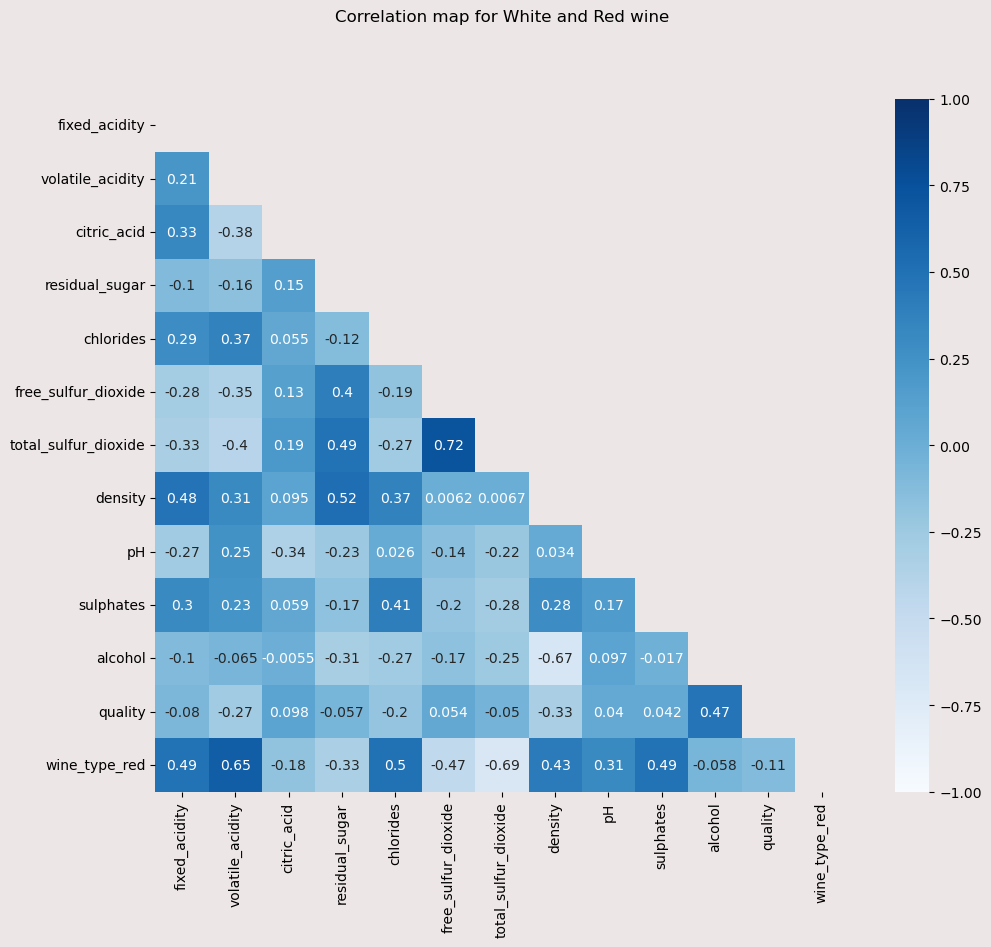

In [9]:
''' create heatmap of correlation with wine_type'''
def correlation_matrix(df):
    if df.equals(white_copy):
        col_scale = sns.color_palette("YlOrBr", as_cmap=True)
        color = white_color
        name = 'White wine'
    elif df.equals(red_copy):
        col_scale = sns.color_palette("Reds", as_cmap=True)
        name = 'Red wine'
        color = red_color
    else:
        col_scale = sns.color_palette("Blues", as_cmap=True)
        name = 'White and Red wine'
        color = all_wine_color
    
    
    fig, axs = plt.subplots(1,1, figsize= (12,9))
    fig.set_facecolor(background_grey)
    axs.set_facecolor(background_grey)
    #plt.subplots_adjust(top=1.15)  # You can adjust the value according to your needs
    
    plt.title(f'Correlation map for {name}', y=1.1)
    corr = df.corr()
   
    threshold  = 0.2
    mask = (np.triu(np.ones_like(corr)))
    
    ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, square = True, annot= True, cmap = col_scale, mask = mask)
correlation_matrix(ml_df)

In [22]:
if 'wine_type' in white_red_copy.columns:
    y = white_red_copy.wine_type
    white_red_copy.drop(['wine_type'], axis = 1, inplace= True)
if 'colour' in white_red_copy.columns:
    white_red_copy.drop(['colour'], axis = 1, inplace= True)
if 'quality_label' in white_red_copy:
    white_red_copy.drop(['quality_label'], axis = 1, inplace = True)

X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)
display(X_train.head())
display(Y_train.head())


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3207,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9,6
612,7.5,0.23,0.68,11.0,0.047,37.0,133.0,0.99780,2.99,0.38,8.8,5
71,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.99580,3.32,0.60,9.5,5
3857,5.4,0.17,0.27,2.7,0.049,28.0,104.0,0.99224,3.46,0.55,10.3,6
312,9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6


,wine_type_red
3207,0.0
612,0.0
71,0.0
3857,0.0
312,1.0


(4256, 1)


In [11]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)
display(X_train.head())

(4256, 12)
(4256, 1)
(1064, 12)
(1064, 1)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3207,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9,6
612,7.5,0.23,0.68,11.0,0.047,37.0,133.0,0.99780,2.99,0.38,8.8,5
71,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.99580,3.32,0.60,9.5,5
3857,5.4,0.17,0.27,2.7,0.049,28.0,104.0,0.99224,3.46,0.55,10.3,6
312,9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6


In [12]:
''' data normalization'''
from sklearn.preprocessing import MinMaxScaler
#fit the data
norm = MinMaxScaler().fit(X_train)
#tranform the data
X_train_norm = norm.transform(X_train)

x_test_norm = norm.transform(x_test)
display(x_test_norm)


array([[0.46280992, 0.22666667, 0.19277108, ..., 0.11797753, 0.37681159,
        0.33333333],
       [0.39669421, 0.37      , 0.40963855, ..., 0.52247191, 0.1884058 ,
        0.33333333],
       [0.15702479, 0.41      , 0.03614458, ..., 0.12359551, 0.31884058,
        0.33333333],
       ...,
       [0.21487603, 0.22666667, 0.05421687, ..., 0.25842697, 0.34782609,
        0.5       ],
       [0.11570248, 0.24      , 0.02409639, ..., 0.06179775, 0.5942029 ,
        0.83333333],
       [0.34710744, 0.23333333, 0.21686747, ..., 0.13483146, 0.20289855,
        0.33333333]])

In [13]:
'''testing the solver parameter'''
def test_solver(solver):
    
    lr = LogisticRegression(random_state = 42, solver= solver, max_iter = 1000)
    lr.fit(X_train, Y_train)
    pred_lr = lr.predict(x_test)
    accuracy_percentage = round(accuracy_score(y_test, pred_lr) * 100,2)
    #print("Accuracy:", accuracy_percentage, "%")
    return accuracy_percentage
   
for val in ['lbfgs', 'liblinear', 'saga', 'sag', 'newton-cholesky', 'newton-cg']:
    print(f'The accuracy of the solver {val}: {test_solver(val)}')
    test_solver(val)

NameError: name 'LogisticRegression' is not defined

In [14]:
'''testing penalty parameter'''
def test_penalty(penalty):
    
    lr = LogisticRegression(random_state = 42, penalty = penalty)
    lr.fit(X_train, Y_train)
    pred_lr = lr.predict(x_test)
    accuracy_percentage = round(accuracy_score(y_test, pred_lr) * 100,2)
    #print("Accuracy:", accuracy_percentage, "%")
    return accuracy_percentage
   

In [15]:
'''create logistic regression as a function'''
def log_regress(X_train, Y_train, x_test, y_test, graph):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    lr = LogisticRegression(random_state = 42, max_iter = 1000)
    lr.fit(X_train, Y_train)
    pred_lr = lr.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_lr)
    accuracy_percentage = round(accuracy_score(y_test, pred_lr) * 100,2)
    print("Accuracy of Logistic Regression:", accuracy_percentage, "%")
    

    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Logistic Regression Confusion Map')        
        plt.show()
    print('________________')
    return accuracy_percentage



log_regress(X_train, Y_train, x_test, y_test, False)

Accuracy of Logistic Regression: 98.12 %
________________


98.12

In [42]:
'''Linear regression'''
def lin_reg(X_train, Y_train, x_test, y_test):
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    from sklearn import linear_model
    linreg = linear_model.LinearRegression()
    linreg.fit(X_train, Y_train)
    accuracy_percentage = (linreg.score(x_test, y_test) * 100).round(2)
    pred_linreg = linreg.predict(x_test)

    print(linreg)
    print("Accuracy of Linear Regression:", accuracy_percentage, "%")
    print('________________')
    return accuracy_percentage


lin_reg(X_train, Y_train, x_test, y_test)




ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [17]:
'''neighbours classifier''' 
def neigh_class(X_train, Y_train, x_test, y_test, graph):
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    accuracy_percentage = (knn.score(x_test, y_test) * 100).round(2)
    print("Accuracy of Neighbours Classifier:", accuracy_percentage, "%")
    pred_neighbours = knn.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_neighbours)    
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Random Forest Confusion Map')
        plt.show()
    print('________________')
    return accuracy_percentage

neigh_class(X_train, Y_train, x_test, y_test, False)

Accuracy of Neighbours Classifier: 93.89 %
________________


93.89

Accuracy of Decision Tree: 98.03 %


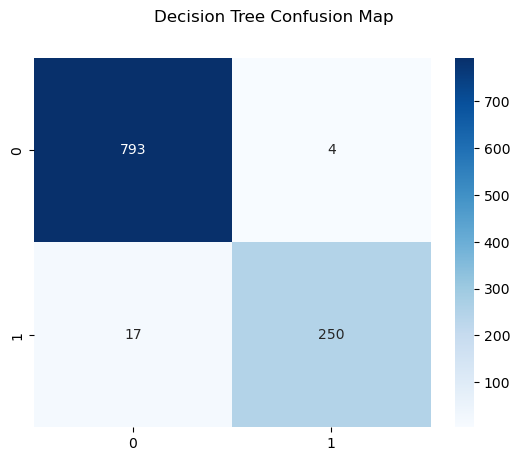

________________


98.03

In [18]:
'''decision tree'''
def dec_tree(X_train, Y_train, x_test, y_test, graph):
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    accuracy_percentage = (tree.score(x_test, y_test) * 100).round(2)
    print("Accuracy of Decision Tree:", accuracy_percentage, "%")
    pred_tree = tree.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_tree)
    plt.show()
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Decision Tree Confusion Map')
        plt.show()
    
    print('________________')
    return accuracy_percentage

dec_tree(X_train, Y_train, x_test, y_test, True)

In [26]:
'''random forest'''
def ran_forest(X_train, Y_train, x_test, y_test, graph) :
    from sklearn.ensemble import RandomForestClassifier
    Y_train = np.ravel(Y_train)
    y_test = np.ravel(y_test)
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
    forest.fit(X_train, Y_train)
    accuracy_percentage = (forest.score(x_test, y_test) * 100).round(2)
    pred_forest = forest.predict(x_test)
    confu_mat = confusion_matrix(y_test, pred_forest)
    print(confu_mat)
    
    print("Accuracy of Random Forest:", accuracy_percentage, "%")
    print(classification_report(y_test, pred_forest))
    
    if graph == True:
        sns.heatmap(confu_mat, annot=True, fmt= 'g', cmap = 'Blues')
        plt.suptitle('Random Forest Confusion Map')
        plt.show()
    print('________________')
    return accuracy_percentage

ran_forest(X_train, Y_train, x_test, y_test, False)
print(X_train.columns)



[[796   1]
 [ 14 253]]
Accuracy of Random Forest: 98.59 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       797
         1.0       1.00      0.95      0.97       267

    accuracy                           0.99      1064
   macro avg       0.99      0.97      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [27]:
log_regress(X_train, Y_train, x_test, y_test, False)
lin_reg(X_train, Y_train, x_test, y_test)
neigh_class(X_train, Y_train, x_test, y_test, False)
dec_tree(X_train, Y_train, x_test, y_test, False)
ran_forest(X_train, Y_train, x_test, y_test, False)


Accuracy of Logistic Regression: 98.12 %
________________
Accuracy of Linear Regression: 85.09 %
________________
Accuracy of Neighbours Classifier: 93.89 %
________________
Accuracy of Decision Tree: 98.03 %
________________
[[796   1]
 [ 14 253]]
Accuracy of Random Forest: 98.59 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       797
         1.0       1.00      0.95      0.97       267

    accuracy                           0.99      1064
   macro avg       0.99      0.97      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________


98.59

In [28]:
index_names = ['Logistic Regression', 'Linear Regression', 'Neighbours Classifier', 'Decision Tree', 'Random Forest']
comparison_df = pd.DataFrame(index=index_names)
#ml_df = ml_df.drop(['quality'], axis = 1)X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['all'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 98.12 %
________________
Accuracy of Linear Regression: 85.09 %
________________
Accuracy of Neighbours Classifier: 93.89 %
________________
Accuracy of Decision Tree: 98.03 %
________________
[[796   1]
 [ 14 253]]
Accuracy of Random Forest: 98.59 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       797
         1.0       1.00      0.95      0.97       267

    accuracy                           0.99      1064
   macro avg       0.99      0.97      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all
Logistic Regression,98.12
Linear Regression,85.09
Neighbours Classifier,93.89
Decision Tree,98.03
Random Forest,98.59


In [29]:
ml_df = ml_df.drop(['alcohol'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['alcohol'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 97.65 %
________________
Accuracy of Linear Regression: 81.64 %
________________
Accuracy of Neighbours Classifier: 93.61 %
________________
Accuracy of Decision Tree: 97.84 %
________________
[[795   2]
 [  8 259]]
Accuracy of Random Forest: 99.06 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       797
         1.0       0.99      0.97      0.98       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.99      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all,alcohol
Logistic Regression,98.12,97.65
Linear Regression,85.09,81.64
Neighbours Classifier,93.89,93.61
Decision Tree,98.03,97.84
Random Forest,98.59,99.06


In [30]:
ml_df = ml_df.drop(['quality'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['quality'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 97.46 %
________________
Accuracy of Linear Regression: 81.18 %
________________
Accuracy of Neighbours Classifier: 93.42 %
________________
Accuracy of Decision Tree: 98.03 %
________________
[[794   3]
 [ 12 255]]
Accuracy of Random Forest: 98.59 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       797
         1.0       0.99      0.96      0.97       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all,alcohol,quality
Logistic Regression,98.12,97.65,97.46
Linear Regression,85.09,81.64,81.18
Neighbours Classifier,93.89,93.61,93.42
Decision Tree,98.03,97.84,98.03
Random Forest,98.59,99.06,98.59


In [31]:
ml_df = ml_df.drop(['citric_acid'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['citric_acid'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 97.65 %
________________
Accuracy of Linear Regression: 81.15 %
________________
Accuracy of Neighbours Classifier: 93.42 %
________________
Accuracy of Decision Tree: 97.93 %
________________
[[797   0]
 [ 13 254]]
Accuracy of Random Forest: 98.78 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       797
         1.0       1.00      0.95      0.98       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all,alcohol,quality,citric_acid
Logistic Regression,98.12,97.65,97.46,97.65
Linear Regression,85.09,81.64,81.18,81.15
Neighbours Classifier,93.89,93.61,93.42,93.42
Decision Tree,98.03,97.84,98.03,97.93
Random Forest,98.59,99.06,98.59,98.78


In [32]:
ml_df = ml_df.drop(['pH'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['pH'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 96.71 %
________________
Accuracy of Linear Regression: 80.66 %
________________
Accuracy of Neighbours Classifier: 93.33 %
________________
Accuracy of Decision Tree: 97.84 %
________________
[[794   3]
 [  8 259]]
Accuracy of Random Forest: 98.97 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       797
         1.0       0.99      0.97      0.98       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.99      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all,alcohol,quality,citric_acid,pH
Logistic Regression,98.12,97.65,97.46,97.65,96.71
Linear Regression,85.09,81.64,81.18,81.15,80.66
Neighbours Classifier,93.89,93.61,93.42,93.42,93.33
Decision Tree,98.03,97.84,98.03,97.93,97.84
Random Forest,98.59,99.06,98.59,98.78,98.97


In [33]:
ml_df = ml_df.drop(['residual_sugar'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['residual_sugar'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 96.71 %
________________
Accuracy of Linear Regression: 77.04 %
________________
Accuracy of Neighbours Classifier: 92.86 %
________________
Accuracy of Decision Tree: 98.12 %
________________
[[795   2]
 [ 12 255]]
Accuracy of Random Forest: 98.68 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       797
         1.0       0.99      0.96      0.97       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all,alcohol,quality,citric_acid,pH,residual_sugar
Logistic Regression,98.12,97.65,97.46,97.65,96.71,96.71
Linear Regression,85.09,81.64,81.18,81.15,80.66,77.04
Neighbours Classifier,93.89,93.61,93.42,93.42,93.33,92.86
Decision Tree,98.03,97.84,98.03,97.93,97.84,98.12
Random Forest,98.59,99.06,98.59,98.78,98.97,98.68


In [34]:
ml_df = ml_df.drop(['density'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['density'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 96.71 %
________________
Accuracy of Linear Regression: 73.8 %
________________
Accuracy of Neighbours Classifier: 92.86 %
________________
Accuracy of Decision Tree: 98.4 %
________________
[[795   2]
 [ 15 252]]
Accuracy of Random Forest: 98.4 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       797
         1.0       0.99      0.94      0.97       267

    accuracy                           0.98      1064
   macro avg       0.99      0.97      0.98      1064
weighted avg       0.98      0.98      0.98      1064

________________


,all,alcohol,quality,citric_acid,pH,residual_sugar,density
Logistic Regression,98.12,97.65,97.46,97.65,96.71,96.71,96.71
Linear Regression,85.09,81.64,81.18,81.15,80.66,77.04,73.80
Neighbours Classifier,93.89,93.61,93.42,93.42,93.33,92.86,92.86
Decision Tree,98.03,97.84,98.03,97.93,97.84,98.12,98.40
Random Forest,98.59,99.06,98.59,98.78,98.97,98.68,98.40


In [35]:
ml_df = ml_df.drop(['free_sulfur_dioxide'], axis = 1)
X_train, x_test, Y_train, y_test = train_test_split( ml_df.iloc[:,:-1],ml_df.iloc[:, -1:], test_size = 0.2, random_state = 42)

comparison_df['free_sulfur_dioxide'] = [log_regress(X_train, Y_train, x_test, y_test, False),
lin_reg(X_train, Y_train, x_test, y_test),
neigh_class(X_train, Y_train, x_test, y_test, False),
dec_tree(X_train, Y_train, x_test, y_test, False),
ran_forest(X_train, Y_train, x_test, y_test, False)]
display(comparison_df)

Accuracy of Logistic Regression: 96.43 %
________________
Accuracy of Linear Regression: 73.58 %
________________
Accuracy of Neighbours Classifier: 93.8 %
________________
Accuracy of Decision Tree: 98.4 %
________________
[[796   1]
 [ 11 256]]
Accuracy of Random Forest: 98.87 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       797
         1.0       1.00      0.96      0.98       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064

________________


,all,alcohol,quality,citric_acid,pH,residual_sugar,density,free_sulfur_dioxide
Logistic Regression,98.12,97.65,97.46,97.65,96.71,96.71,96.71,96.43
Linear Regression,85.09,81.64,81.18,81.15,80.66,77.04,73.80,73.58
Neighbours Classifier,93.89,93.61,93.42,93.42,93.33,92.86,92.86,93.80
Decision Tree,98.03,97.84,98.03,97.93,97.84,98.12,98.40,98.40
Random Forest,98.59,99.06,98.59,98.78,98.97,98.68,98.40,98.87


In [ ]:
print(ml_df.head())

In [36]:
ml_df_2 = white_red_copy[['fixed_acidity', 'volatile_acidity', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
        'sulphates','wine_type_red']]
X_train, x_test, Y_train, y_test = train_test_split( ml_df_2.iloc[:,:-1],ml_df_2.iloc[:, -1:], test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
Y_train = np.ravel(Y_train)
y_test = np.ravel(y_test)

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

accuracy_percentage = (forest.score(x_test, y_test) * 100).round(2)
print(accuracy_percentage)
print('_____')
print(feature_importance_df)





98.87
_____
                Feature  Importance
0         fixed_acidity    0.022211
1      volatile_acidity    0.045238
2        residual_sugar    0.054427
3             chlorides    0.379324
4   free_sulfur_dioxide    0.031496
5  total_sulfur_dioxide    0.294133
6               density    0.099427
7             sulphates    0.073743


In [37]:
''' lets see what happens when i ditch outliers'''
def outlier_drop_iqr(df_outlier, col):
    q1 = df_outlier[col].quantile(0.25)
    q3 = df_outlier[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    df_outlier = df_outlier[(df_outlier[col] >= lower_bound) & (df_outlier[col] <= upper_bound)]
    return df_outlier

In [38]:
ml_df_3 = white_red_copy[['fixed_acidity', 'volatile_acidity','residual_sugar','chlorides', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'wine_type_red']]
for val in ml_df_3.columns[:-1]:
    print(val)
    ml_df_3 = outlier_drop_iqr(ml_df_3, val)



X_train, x_test, Y_train, y_test = train_test_split( ml_df_3.iloc[:,:-1],ml_df_3.iloc[:, -1:], test_size = 0.2, random_state = 42)


fixed_acidity
volatile_acidity
residual_sugar
chlorides
total_sulfur_dioxide
density
pH
sulphates


In [39]:
log_regress(X_train, Y_train, x_test, y_test, False)
lin_reg(X_train, Y_train, x_test, y_test)
neigh_class(X_train, Y_train, x_test, y_test, False)
dec_tree(X_train, Y_train, x_test, y_test, False)
ran_forest(X_train, Y_train, x_test, y_test, False)
print(ml_df_3.shape)


Accuracy of Logistic Regression: 98.06 %
________________
Accuracy of Linear Regression: 76.69 %
________________
Accuracy of Neighbours Classifier: 96.61 %
________________
Accuracy of Decision Tree: 99.03 %
________________
[[721   0]
 [  5  99]]
Accuracy of Random Forest: 99.39 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       721
         1.0       1.00      0.95      0.98       104

    accuracy                           0.99       825
   macro avg       1.00      0.98      0.99       825
weighted avg       0.99      0.99      0.99       825

________________
(4124, 9)
